# Filtering Reality: Fake News Detection through Text Classification

### Goal:
The goal of this project is to create a text classifier that can identify wether news are fake or real, scanning the words of the targeted article and delivering a precise conclusion.

In [2]:
%pip install pandas matplotlib scikit-learn

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------------------------------------- - 10.5/11.0 MB 55.5 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 42.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 42.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -------------------------------- ------- 7.1/8.7 MB 35.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 29.1 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [22]:
data = pd.read_csv('dataset/training_data.csv')

In [23]:
# Read file line by line
data = pd.read_csv("dataset/training_data.csv", header=None, names=["text"])

# Split into label and headline
data["label"] = data["text"].str[0].astype(int)
data["headline"] = data["text"].str[2:]

# Keep only what you need
data = data[["label", "headline"]]

print(data.head())

   label                                           headline
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...


In [24]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
data["headline"] = data["headline"].apply(
    lambda x: " ".join([stemmer.stem(word) for word in x.split()])
)


In [26]:
# Splitting
X_train, X_val, y_train, y_val = train_test_split(
    data["headline"], data["label"], test_size=0.2, random_state=42
)

In [ ]:
# Convert text to numeric & create vectorizer with TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)




In [28]:
# Train a classifier (Logistic Regression is a good baseline)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [32]:
# Evaluate on validation set
y_pred = clf.predict(X_val_tfidf)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.9352949787732396
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3529
           1       0.92      0.95      0.93      3302

    accuracy                           0.94      6831
   macro avg       0.94      0.94      0.94      6831
weighted avg       0.94      0.94      0.94      6831



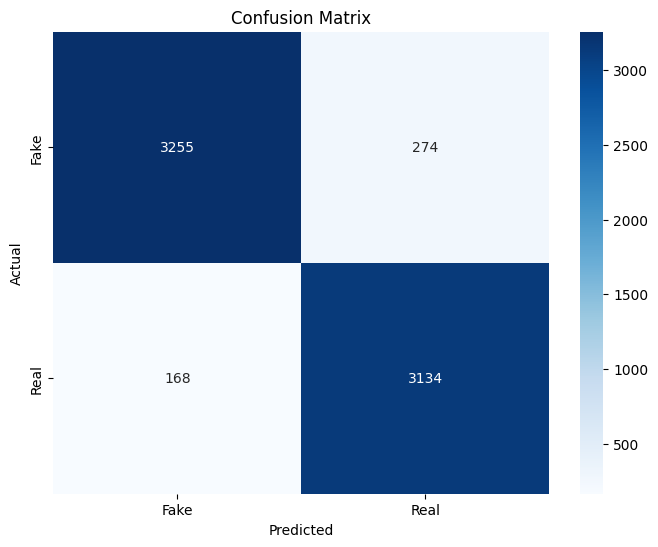

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3529
           1       0.92      0.95      0.93      3302

    accuracy                           0.94      6831
   macro avg       0.94      0.94      0.94      6831
weighted avg       0.94      0.94      0.94      6831



NameError: name 'tfidf_vectorizer' is not defined

<Figure size 1000x800 with 0 Axes>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


X_val_tfidf = vectorizer.transform(X_val)  # your fitted TF-IDF vectorizer
# -----------------------------
# 3. Model Training
# -----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)  # Fit first

# -----------------------------
# 4. Predictions
# -----------------------------
X_val_tfidf = vectorizer.transform(X_val)  # Transform validation data
val_pred = model.predict(X_val_tfidf)      # Now predict safely


# -----------------------------
# 5. Confusion Matrix
# -----------------------------
cm = confusion_matrix(y_val, val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Print classification report
print(classification_report(y_val, val_pred))

# -----------------------------
# 6. Top Feature Correlation (Optional)
# -----------------------------
# Convert sparse matrix to dense (beware large memory usage!)
X_dense = X_train_tfidf.toarray()

# Get top 20 features by variance
feature_vars = np.var(X_dense, axis=0)
top_20_idx = np.argsort(feature_vars)[-20:]
top_features_corr = np.corrcoef(X_dense[:, top_20_idx].T)

plt.figure(figsize=(10, 8))
sns.heatmap(top_features_corr, cmap='coolwarm', center=0,
            xticklabels=np.array(tfidf_vectorizer.get_feature_names_out())[top_20_idx],
            yticklabels=np.array(tfidf_vectorizer.get_feature_names_out())[top_20_idx])
plt.title('Top 20 Features Correlation Matrix')
plt.show()

In [33]:
# trying different models...
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    preds = model.predict(X_val_tfidf)
    print(name, "Accuracy:", accuracy_score(y_val, preds))


Logistic Regression Accuracy: 0.9352949787732396
Naive Bayes Accuracy: 0.9263651002781438
Linear SVM Accuracy: 0.9377836334358074


In [34]:
import pandas as pd

test_df = pd.read_csv("dataset/testing_data.csv", header=None, names=["text"])

# Extract the headline
test_df["headline"] = test_df["text"].str[2:]

# Transform headlines using the SAME vectorizer you used for training
X_test_tfidf = vectorizer.transform(test_df["headline"])

# Predict with trained classifier
preds = clf.predict(X_test_tfidf)


test_df_out = pd.DataFrame({
    "label": preds,
    "headline": test_df["headline"]
})

test_df_out.to_csv("dataset/testing_data_predictions.csv",
                   sep=" ", index=False, header=False)


In [ ]:
#%pip install -U transformers

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from transformers import pipeline
MODEL = "jy46604790/Fake-News-Bert-Detect"
clf = pipeline("text-classification", model=MODEL, tokenizer=MODEL)


Device set to use cpu


In [19]:
import pandas as pd
from sklearn.metrics import accuracy_score
from transformers import pipeline

# 1. Load your dataset
df = pd.read_csv(r"C:\Users\pktto\OneDrive\Escritorio\Ironhack\Week 7\Day 3\training_data.csv", sep="\t", header=None, names=["label", "text"])
df = df.dropna()
df["label"] = df["label"].astype(int)

# 2. Use a transformer pipeline (zero-shot or fine-tuned for sequence classification)
classifier = pipeline("text-classification", model="jy46604790/Fake-News-Bert-Detect", truncation=True)

# 3. Run predictions
preds = []
for text in df["text"]:
    result = classifier(text)[0]
    label = 1 if result["label"] == "POSITIVE" else 0
    preds.append(label)

# 4. Accuracy
acc = accuracy_score(df["label"], preds)
print(f"Accuracy: {acc:.4f}")


Device set to use cpu


KeyboardInterrupt: 

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    ngram_range=(1,2),  # unigrams + bigrams
    max_features=10000, 
    min_df=5, 
    max_df=0.8,
    stop_words='english'
)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)


In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

# Logistic Regression
lr_params = {"C": [0.01, 0.1, 1, 10, 100], "solver": ['liblinear', 'lbfgs']}
lr_grid = GridSearchCV(LogisticRegression(max_iter=2000), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train_tfidf, y_train)
print("Best LR params:", lr_grid.best_params_)
print("Best LR CV Accuracy:", lr_grid.best_score_)

# Linear SVM
svm_params = {"C": [0.01, 0.1, 1, 10, 100]}
svm_grid = GridSearchCV(LinearSVC(max_iter=5000), svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train_tfidf, y_train)
print("Best SVM params:", svm_grid.best_params_)
print("Best SVM CV Accuracy:", svm_grid.best_score_)


Best LR params: {'C': 10, 'solver': 'liblinear'}
Best LR CV Accuracy: 0.9361661458047283
Best SVM params: {'C': 1}
Best SVM CV Accuracy: 0.9358367369082368


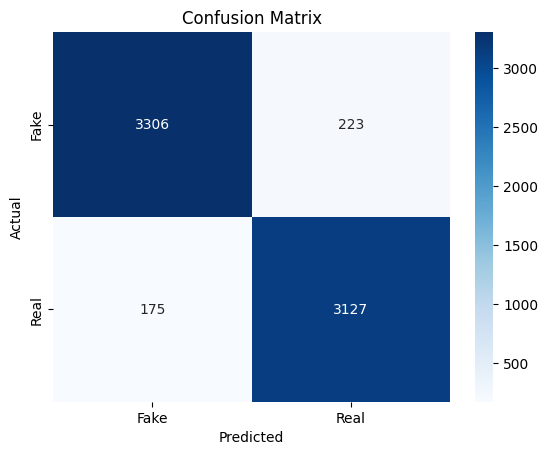

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3529
           1       0.93      0.95      0.94      3302

    accuracy                           0.94      6831
   macro avg       0.94      0.94      0.94      6831
weighted avg       0.94      0.94      0.94      6831



In [59]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

best_model = lr_grid.best_estimator_  # or svm_grid.best_estimator_
val_pred = best_model.predict(X_val_tfidf)

cm = confusion_matrix(y_val, val_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_val, val_pred))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 done
Epoch 2 done


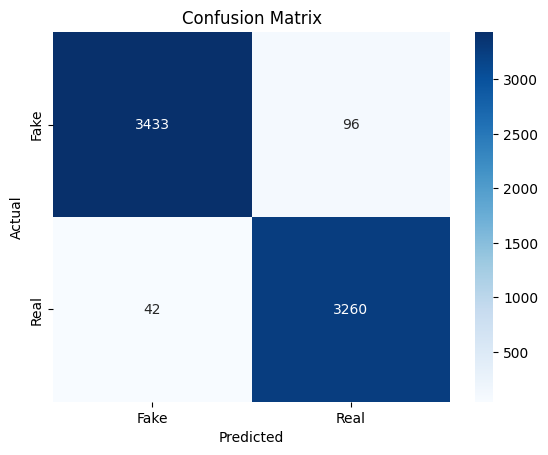

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3529
           1       0.97      0.99      0.98      3302

    accuracy                           0.98      6831
   macro avg       0.98      0.98      0.98      6831
weighted avg       0.98      0.98      0.98      6831



In [66]:
# -----------------------------
# 1️⃣ Imports
# -----------------------------
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 2️⃣ Load data (example)
# -----------------------------
import pandas as pd

data = pd.read_csv("dataset/training_data.csv", sep="\t", header=None, names=["label", "headline"])
data['label'] = data['label'].astype(int)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['headline'].tolist(),
    data['label'].tolist(),
    test_size=0.2,
    random_state=42
)

# -----------------------------
# 3️⃣ Tokenizer + Model
# -----------------------------
tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased-finetuned-sst-2-english", num_labels=2)

# -----------------------------
# 4️⃣ Encode data
# -----------------------------
def encode(texts):
    return tokenizer(texts, padding=True, truncation=True, return_tensors="pt")

train_encodings = encode(train_texts)
val_encodings = encode(val_texts)

# -----------------------------
# 5️⃣ Simple training loop
# -----------------------------
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW

train_dataset = TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(train_labels))
val_dataset = TensorDataset(val_encodings['input_ids'], val_encodings['attention_mask'], torch.tensor(val_labels))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

optimizer = AdamW(model.parameters(), lr=2e-5)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

model.train()
for epoch in range(2):  # just 2 epochs for example
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} done")

# -----------------------------
# 6️⃣ Predictions + Confusion Matrix
# -----------------------------
model.eval()
all_preds = []

with torch.no_grad():
    for batch in val_loader:
        input_ids, attention_mask, _ = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(val_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(val_labels, all_preds))



In [67]:
print(torch.cuda.is_available())

False
